In [11]:
smooth = (1,2)
x,y = smooth
import numpy as np
import scipy
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt

In [6]:
np.multiply(np.array([1,2]),np.array([1,2]))

array([1, 4])

In [11]:
x = np.array([[0,0]])

In [18]:
x = np.array([[1,2,3],[12,14,1],[1,21,1]])

In [30]:
shift = (x[:,:]-x.mean())
shift_sq = shift**2
shift_sq_sum = np.sum(shift_sq)
np.sqrt(shift_sq_sum)

21.202725191719

In [27]:
shift@shift.T,shift**2

(array([[ 55.48148148, -46.18518519, -18.2962963 ],
        [-46.18518519, 121.14814815, 112.03703704],
        [-18.2962963 , 112.03703704, 272.92592593]]),
 array([[ 27.27160494,  17.82716049,  10.38271605],
        [ 33.38271605,  60.49382716,  27.27160494],
        [ 27.27160494, 218.38271605,  27.27160494]]))

In [31]:
w = np.array([[1,2,3]])
y = np.array([[1,2,3]])

w*y

array([[1, 4, 9]])

In [ ]:
image = np.zeros((10,10))
np.fill_diagonal(image,1)
print(image)
import matplotlib.pyplot as plt
import time
plt.imshow(image)
plt.show()

def test_sliding_window(image,window_size):
    
    # define window operation
    smooth_im_shape = (image.shape[0]-(window_size-1),image.shape[1]-(window_size-1))
    smooth_im = np.zeros(smooth_im_shape)
    print(smooth_im.shape)
    
    for j in range(window_size//2,image.shape[0]-window_size//2):
        
        for i in range(window_size//2,image.shape[1]-window_size//2):

            window = image[j-window_size//2:j+window_size//2+1\
                           ,i-window_size//2:i+window_size//2+1]
            
            #print(j,i)
            
            
            smooth_im[j-window_size//2,i-window_size//2] = np.mean(np.mean(gaussian_filter(window,window_size//7)))
            #plt.imshow(window)
            #plt.show()
            #time.sleep(1)

            
    
    
    plt.imshow(smooth_im,cmap = 'gray')
    plt.show()
    #return smooth_im       

test_sliding_window(image,5)

In [14]:
def convolve_row_wise(image,kernel): # function for row kernel
    output_im_shape = (image.shape[0],image.shape[1]-(kernel.shape[1]-1))
    output_im = np.zeros(output_im_shape)
    
    m = kernel.shape[1]
    #print(m)
    for j in range(output_im_shape[0]): # all rows
        for i in range(m//2,image.shape[1]-m//2): # losing some columns

            kernel_output = 0
        
            for k in range(m): 
                #print(k,i,j)
                kernel_output += image[j,i+(k-m//2)]*kernel[0,k]    
            
            output_im[j-m//2,i-m//2] = kernel_output
            
    return output_im   
    

    
    
def convolve_col_wise(image,kernel): # function for column kernel
    
    output_im_shape = (image.shape[0]-(kernel.shape[0]-1),image.shape[1])
    output_im = np.zeros(output_im_shape)

    m = kernel.shape[0]
    #print(m)
    for j in range(m//2,output_im_shape[0]-m//2): # all rows
        for i in range(image.shape[1]): # losing some columns

            kernel_output = 0

            for k in range(m): 
                #print(k,i,j)
                kernel_output += image[j+(k-m//2),i]*kernel[k,0]    

            output_im[j-m//2,i-m//2] = kernel_output

    return output_im  

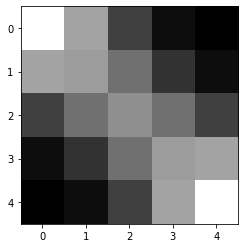

In [13]:
x = np.eye(5)

y = gaussian_filter(x,1,truncate = 2)

plt.imshow(y,cmap = 'gray')

In [ ]:
d_x = np.array([[-.5,0,.5]])
d_y = np.array([[-.5,0,.5]]).T


dx_im = convolve_row_wise(smooth_im,d_x) # we lose 2 columns
dy_im = convolve_col_wise(smooth_im,d_y) # we lose 2 rows

In [ ]:
def nms(C_image,Ixx,Iyy,windowSize):


    # need to remove some data from the edges of the gradient matrices
    # the corner detector removed some data
    print(Ixx.shape,Iyy.shape)
    Ixx = Ixx[windowSize//2:-windowSize//2,windowSize//2:-windowSize//2]
    Iyy = Iyy[windowSize//2:-windowSize//2,windowSize//2:-windowSize//2]


    g_mag = Ixx*Iyy
    g_theta = np.zeros((g_mag.shape))
    print(g_mag.shape)

    for i in range(g_mag.shape[1]):
        for j in range(g_mag.shape[0]):


            try:

                if Iyy[j,i]==0 & Ixx[0,0] == 0:
                    continue

                else:
                    g_theta[j,i] = math.atan(Iyy[j,i]/Ixx[j,i])

            except:
                g_theta[j,i] = math.atan(Iyy[j,i]/.00001) 

    #image = g_mag.copy()
    image = C_image.copy()
    print(image.shape)
    window_size = windowSize
    m = 0

    # -------------- window iteration sliding ------------------------#
    for i in range(window_size//2,g_mag.shape[1]-window_size//2):
        for j in range(window_size//2,g_mag.shape[0]-window_size//2):

            window = image[j-window_size//2:j+window_size//2+1\
                           ,i-window_size//2:i+window_size//2+1]

            if i == window_size//2: # sanity check ourselves
                try:
                    assert window.shape == (window_size,window_size) 
                except:
                    print(window.shape,i,j)
                    return


            # ------------- find points in line with the gradient -------# 

            '''
            # going to derive an equation for the line created 
            by the gradient and see which pixels intersect that line

             grad.dir     ^ y
                     \    |
                      \   |
                       \  |
                        \ |
                         \|
               x<- - - - - 


            '''

            intensity = image[j,i]
            theta     = g_theta[j,i]
            candidates = np.zeros(window.shape)

#             # check for horizontal lines:
#             if abs(math.tan(theta))*window_size//2 <= 1:
#                 candidates[window_size//2,:] = 1

#     #         # check for vertical lines
#     #         elif abs(math.tan(theta)) > window_size//2: 

#     #             candidates[:,window_size//2] = 1

#             else:

#                 # derive equation for the line
#                 y_coord = window_size//2 # this is the center of our nms window
#                 x_coord = window_size//2 #
#                 b = y_coord - math.tan(theta)*x_coord # line eq


#                 # new we find what values the line intersects
#                 for k in range(window_size): # x values
#                     for l in range(window_size): # y values

#                         if k == window_size//2 & l == window_size//2: # skip the center point
#                             candidates[l,k]=1
#                             continue
                            

#                         y_value = math.tan(theta)*k+b 
#                         y_pix = np.round(y_value,0).astype(int)# the pixel that the line itersects is the floor value of y

#                         if y_pix == l:
#                             candidates[l,k]=1
                
            y_coord = window_size//2 # this is the center of our nms window
            x_coord = window_size//2 #
            b = y_coord - math.tan(theta)*x_coord # line eq            


            for k in range(window_size): # x values

                        y_value = math.tan(theta)*k+b 
                        y_pix = np.round(y_value,0).astype(int)# the pixel that the line itersects is the floor value of y

                        if k == window_size//2 & l == window_size//2: # skip the center point
                            candidates[l,k]=1 
                            continue

                        if y_pix <= window_size:
                            candidates[y_pix,k]=1         
                            
                            
                            
                            ### TRY REARRANGING THIS SO WE TURN ON EVERYTHING ON THE LINE


    #         if i/50 in [1,2,3,4,5,6]:
    #             print(abs(math.tan(theta)))
    #             print(candidates)

            # --------- compare candidates to the center value -------------# 

            updated_window = window.copy()
            max_val_loc = ()
            max_val = intensity

            for k in range(window_size):
                for l in range(window_size):

                    if candidates[l,k]==1: # make sure its along the gradient
                        candidate_value = window[l,k]

                        if candidate_value > max_val: 
                            # find our maximum value along the line
                            max_val == candidate_value
                            max_val_loc = (l,k)


            # zero out non-max values

            if len(max_val_loc) == 0: 
                # our center point had the highest value, 
                # set the rest of the candidates == 0
                updated_window[np.where(candidates==1)]=0
            else:
                updated_window[np.where(candidates==1)]=0
                updated_window[max_val_loc[0],max_val_loc[1]]=max_val

#         if max_val > 0:
#             print(max_val)
#             print(candidates)



            #update the image
            image[j-window_size//2:j+window_size//2+1\
                  ,i-window_size//2:i+window_size//2+1] = updated_window

    return image
